In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Estimación de Sistema de Primer Orden con Mínimos con regularización

Se tiene un sistema dado por la siguiente relación:

$$y(t) = \theta_0.x(t) + \theta_1.\frac{dy}{dt}$$

En tiempo discreto se tendría lo siguiente:

$$y[k] = \theta_0.x[k] + \theta_1.y[k-1]$$

Por tanto el modelo estaría dado por:

$$y[k] = \phi.\theta$$

Donde:
$$\phi = \begin{bmatrix}x[k]&y[k-1]\end{bmatrix}$$

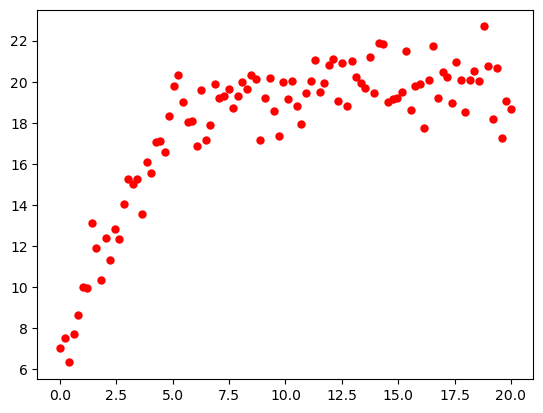

In [18]:
## Generando los valores medidos a partir 
## de un valor ideal contaminado por ruido
ones = np.linspace([1],[1],100)
t = np.linspace([0],[20],100)
x = np.linspace([5],[5],100)
y1 = np.linspace([0],[0],100)
y = 20-15*np.exp(-t/3)
r = 1
yn = y + np.random.normal(0,r,t.shape)
plt.scatter(t,yn,color = 'red',linewidths= 0.01)

In [21]:
### Creando el arreglo y[n-1]
for k in range(1,len(yn)):
    y1[[k]]=yn[[k-1]]

## Creación del vector phi
phi = np.concatenate((x, y1), axis=1)

##phi = np.concatenate((ones, np.exp(-t/2)), axis=1)

alpha = 0.2            #Valor de regularización
A = np.dot(phi.T,phi)+alpha*np.eye(2)
theta = np.dot(np.linalg.inv(A),np.dot(phi.T,yn))
theta

array([[0.68160306],
       [0.81765716]])

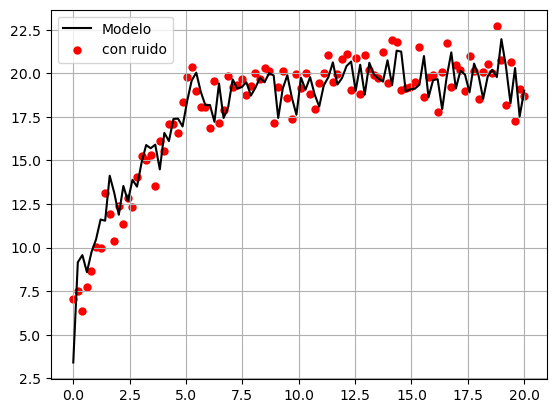

In [22]:
#y_estimado = p_estimado[[0]]*x + p_estimado[[1]]*y1
y_e = np.dot(phi,theta);

plt.plot(t,y_e,color = 'black')
plt.scatter(t,yn,color = 'red',linewidths= 0.01)
plt.legend(['Modelo','con ruido'])
plt.grid()